In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import skimage

In [2]:
I = cv2.imread("inputs/bar.png")
can=cv2.Canny(I, 50, 200 , None , 3)

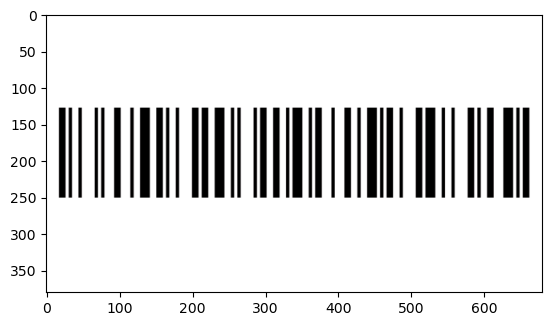

In [4]:
fig=plt.imshow(I)

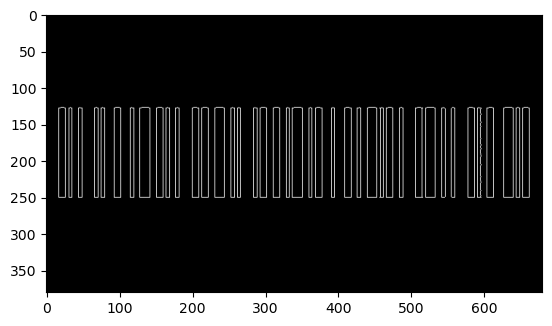

In [10]:
fig=plt.imshow(can, cmap='gray')

In [11]:
cor=np.argwhere(can > 0)
max_ro=np.linalg.norm(np.asarray(can.shape))
y=cor[:,0]
x=cor[:,1]
thetas=50
ros=400
th=np.linspace(0, np.pi/2,thetas)
scale=10
th_n=((th)*thetas*2/np.pi).astype(np.int32)
mat=np.zeros((int(max_ro),thetas+1), dtype=np.uint8)

for i in range(0,x.shape[0],1):
    ro=x[i]*np.cos(th)+y[i]*np.sin(th)
    ro_n=ro.astype(np.int32)
    #ro_n=np.flip(ro_n)
    mat[ro_n,th_n]=mat[ro_n,th_n]+1
    
#from hough space back to cartisian
mmx=np.max(mat)
lines=np.argwhere(mat>mmx-80)
lines=lines.astype(np.float32)
th_res=lines[:,1]*np.pi/(2*thetas)
lines[:,1]=th_res

Iout = I.copy()
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0]
        theta = lines[i][1]
        a, b = math.cos(theta), math.sin(theta)
        x0, y0 = a * rho, b * rho
        x0=x0.astype(np.int32)
        y0=y0.astype(np.int32)
        pt1 = np.int32((x0 - 1000 * b, y0 + 1000 * a))
        pt2 = np.int32((x0 + 1000 * b, y0 - 1000 * a))
        cv2.line(Iout, pt1, pt2, (0, 255, 0), 1, cv2.LINE_AA)

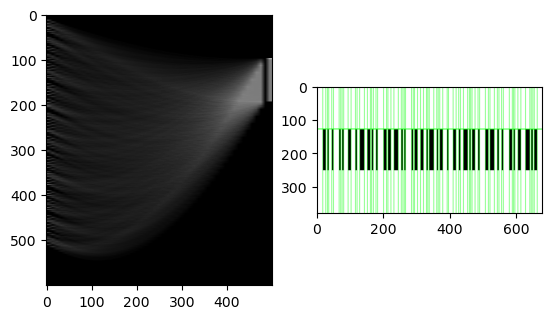

In [16]:
img=cv2.resize(mat,(500,600))
fig=plt.subplot(1,2,1)
fig=plt.imshow(img, cmap='gray')
fig=plt.subplot(1,2,2)
fig=plt.imshow(Iout)